In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ecaa_df = pd.read_csv('energy_conservation_assistance_act_25.csv')
ecaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _id                            943 non-null    int64  
 1   OBJECTID                       943 non-null    int64  
 2   OID                            943 non-null    int64  
 3   Address                        943 non-null    object 
 4   City                           943 non-null    object 
 5   County                         943 non-null    object 
 6   Zip                            943 non-null    int64  
 7   Year                           941 non-null    float64
 8   Recipient                      943 non-null    object 
 9   Approved Loan Amount           943 non-null    int64  
 10  Recipient Type                 943 non-null    object 
 11  Project Type                   943 non-null    object 
 12  Project Status                 943 non-null    obj

In [3]:
ecaa_df.head()

,_id,OBJECTID,OID,Address,City,County,Zip,Year,Recipient,Approved Loan Amount,...,DDLon_D,GlobalID,CreationDate,Creator,EditDate,Editor,x,y,x2,y2
0,1,1,1,"26577 CA-18, Rimforest, CA 92378",Rimforest,San Bernardino,92378,2020.0,Rim of the World Recreation and Parks,156776,...,-117.223759,b24b3ec1-9c03-48e7-b288-f392bc5bd13a,8/22/2022 3:59:00 PM,mlaw_CAEnergy,7/19/2023 5:14:00 PM,SLocwood_CAEnergy,-117.223759,34.229645,-1.304929e+07,4.059680e+06
1,2,2,2,"3325 E Merced Falls Rd, Snelling, CA 95369",Snelling,Merced,95369,2020.0,Snelling Community Services District,220000,...,-120.419066,8b380be0-f4c4-48be-8301-e7b1049daf76,8/22/2022 3:59:00 PM,mlaw_CAEnergy,7/19/2023 5:14:00 PM,SLocwood_CAEnergy,-120.419066,37.521906,-1.340499e+07,4.512106e+06
2,3,4,5,"3101 Center St, Placerville, CA 95667",Placerville,El Dorado,95667,2019.0,City of Placerville,784112,...,-120.802628,cfe61309-2d41-4459-8b52-ad4762a56c50,8/22/2022 3:59:00 PM,mlaw_CAEnergy,7/19/2023 5:15:00 PM,SLocwood_CAEnergy,-120.802628,38.728678,-1.344769e+07,4.682881e+06
3,4,5,6,"250 N Ventura Rd, Port Hueneme, CA 93041",Port Hueneme,Ventura,93041,2019.0,City of Port Hueneme,840272,...,-119.194938,7b5d38cc-3edb-4867-88e5-7d1866945d41,8/22/2022 3:59:00 PM,mlaw_CAEnergy,7/19/2023 5:15:00 PM,SLocwood_CAEnergy,-119.194938,34.149900,-1.326872e+07,4.048948e+06
4,5,6,7,"11330 Bullis Rd, Lynwood, CA 90262",Lynwood,Los Angeles,90262,2019.0,City of Lynwood,1700207,...,-118.199130,400c28c8-c7cb-4482-ba4b-7ac1ac85e498,8/22/2022 3:59:00 PM,mlaw_CAEnergy,7/19/2023 5:15:00 PM,SLocwood_CAEnergy,-118.199130,33.926316,-1.315787e+07,4.018912e+06


In [4]:
ecaa_df = ecaa_df[['Year','Recipient','Project Type','Project Status','Estimated Savings ($/yr)','Annual Electric Savings (kWh)','Utility','Type of Utility']]

In [5]:
ecaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           941 non-null    float64
 1   Recipient                      943 non-null    object 
 2   Project Type                   943 non-null    object 
 3   Project Status                 943 non-null    object 
 4   Estimated Savings ($/yr)       941 non-null    float64
 5   Annual Electric Savings (kWh)  942 non-null    float64
 6   Utility                        939 non-null    object 
 7   Type of Utility                939 non-null    object 
dtypes: float64(3), object(5)
memory usage: 59.1+ KB


In [6]:
# changing Year dtype to string
# also removing trailing .0 by replacing with blank
ecaa_df['Year'] = ecaa_df['Year'].astype(str).str.replace('.0','')

In [7]:
ecaa_df.head()

,Year,Recipient,Project Type,Project Status,Estimated Savings ($/yr),Annual Electric Savings (kWh),Utility,Type of Utility
0,2020,Rim of the World Recreation and Parks,ECAA-Reg,Completed,9615.0,58805.00,PacifiCorp,IOU
1,2020,Snelling Community Services District,ECAA-Reg,Completed,13674.0,62157.00,San Diego Gas & Electric,IOU
2,2019,City of Placerville,ECAA-Reg,Completed,60017.0,320835.53,Merced Irrigation District,POU
3,2019,City of Port Hueneme,ECAA-Reg,Completed,54618.0,376563.00,Pacific Gas & Electric Company,IOU
4,2019,City of Lynwood,ECAA-Reg,Completed,140100.0,1314045.00,San Diego Gas & Electric,IOU


In [8]:
ecaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           943 non-null    object 
 1   Recipient                      943 non-null    object 
 2   Project Type                   943 non-null    object 
 3   Project Status                 943 non-null    object 
 4   Estimated Savings ($/yr)       941 non-null    float64
 5   Annual Electric Savings (kWh)  942 non-null    float64
 6   Utility                        939 non-null    object 
 7   Type of Utility                939 non-null    object 
dtypes: float64(2), object(6)
memory usage: 59.1+ KB


In [9]:
ecaa_df.tail()

,Year,Recipient,Project Type,Project Status,Estimated Savings ($/yr),Annual Electric Savings (kWh),Utility,Type of Utility
938,2023,Red Bluff Joint Union Elementary School District,ECAA-Ed,Active,185317.0,732656.0,Pacific Gas & Electric Company,IOU
939,2023,Guadalupe Union School District,ECAA-Ed,Active,160024.0,439426.0,Pacific Gas & Electric Company,IOU
940,2023,Tulare County Office of Education,ECAA-Ed,Active,265262.0,1269894.0,Southern California Edison,IOU
941,2023,Alpine Fire Protection District,ECAA-Reg,Completed,27870.0,132800.0,San Diego Gas & Electric,IOU
942,2022,City of Eureka,ECAA-Reg,Completed,94970.0,525646.0,Pacific Gas & Electric Company,IOU


In [10]:
ecaa_df.isnull().sum()

Year                             0
Recipient                        0
Project Type                     0
Project Status                   0
Estimated Savings ($/yr)         2
Annual Electric Savings (kWh)    1
Utility                          4
Type of Utility                  4
dtype: int64

In [11]:
ecaa_df.tail()

,Year,Recipient,Project Type,Project Status,Estimated Savings ($/yr),Annual Electric Savings (kWh),Utility,Type of Utility
938,2023,Red Bluff Joint Union Elementary School District,ECAA-Ed,Active,185317.0,732656.0,Pacific Gas & Electric Company,IOU
939,2023,Guadalupe Union School District,ECAA-Ed,Active,160024.0,439426.0,Pacific Gas & Electric Company,IOU
940,2023,Tulare County Office of Education,ECAA-Ed,Active,265262.0,1269894.0,Southern California Edison,IOU
941,2023,Alpine Fire Protection District,ECAA-Reg,Completed,27870.0,132800.0,San Diego Gas & Electric,IOU
942,2022,City of Eureka,ECAA-Reg,Completed,94970.0,525646.0,Pacific Gas & Electric Company,IOU


In [12]:
ecaa_df.loc[ecaa_df['Year'] == '1987']

,Year,Recipient,Project Type,Project Status,Estimated Savings ($/yr),Annual Electric Savings (kWh),Utility,Type of Utility


In [13]:
# Project Status Type Count
ecaa_df['Project Status'].value_counts()

Project Status
Completed    904
Active        38
Cancelled      1
Name: count, dtype: int64

In [14]:
# Descriptive Statistics for Each Status
ecaa_df[ecaa_df['Project Status'] == 'Completed'].describe()

,Estimated Savings ($/yr),Annual Electric Savings (kWh)
count,902.000000,9.030000e+02
mean,51389.218497,4.657262e+05
std,86986.974349,1.425319e+06
min,0.000000,-2.296000e+03
25%,251.937500,1.827576e+03
50%,7224.500000,7.991417e+04
75%,65784.250000,4.326315e+05
max,471682.000000,3.470686e+07


In [15]:
ecaa_df[ecaa_df['Project Status'] == 'Active'].describe()

,Estimated Savings ($/yr),Annual Electric Savings (kWh)
count,38.000000,3.800000e+01
mean,149768.973684,6.386955e+05
std,74291.413244,3.604697e+05
min,42341.000000,1.289760e+05
25%,84705.000000,3.437848e+05
50%,148664.000000,5.737755e+05
75%,200472.000000,8.606272e+05
max,321266.000000,1.494789e+06


In [16]:
ecaa_df.describe()

,Estimated Savings ($/yr),Annual Electric Savings (kWh)
count,941.000000,9.420000e+02
mean,55354.131864,4.725666e+05
std,88575.525665,1.397722e+06
min,0.000000,-2.296000e+03
25%,371.600000,3.609999e+03
50%,8142.000000,9.812411e+04
75%,79396.000000,5.238500e+05
max,471682.000000,3.470686e+07


In [17]:
# Average annual elecric savings (kWh) from 1979 - 2023 for all projects

ecaa_df['Annual Electric Savings (kWh)'].mean()

472566.62164516776

In [18]:
# Total annual elecric savings (kWh) from 1979 - 2023 for all projects

ecaa_df['Annual Electric Savings (kWh)'].sum()

445157757.589748

In [19]:
# Average estimated annual dollar savings from 1979 - 2023 for all projects

ecaa_df['Estimated Savings ($/yr)'].mean()

55354.131864293304

In [20]:
# Total estimated annual dollar savings from 1979 - 2023 for all projects

ecaa_df['Estimated Savings ($/yr)'].sum()

52088238.0843

# Over Time

In [21]:
ecaa_df['Year'] = pd.to_datetime(ecaa_df['Year'], format='%Y')

In [22]:
ecaa_df['Annual_Electric_Savings_GWh'] = ecaa_df['Annual Electric Savings (kWh)'] / 1000000

In [23]:
ecaa_df.head()

,Year,Recipient,Project Type,Project Status,Estimated Savings ($/yr),Annual Electric Savings (kWh),Utility,Type of Utility,Annual_Electric_Savings_GWh
0,2020-01-01,Rim of the World Recreation and Parks,ECAA-Reg,Completed,9615.0,58805.00,PacifiCorp,IOU,0.058805
1,2020-01-01,Snelling Community Services District,ECAA-Reg,Completed,13674.0,62157.00,San Diego Gas & Electric,IOU,0.062157
2,2019-01-01,City of Placerville,ECAA-Reg,Completed,60017.0,320835.53,Merced Irrigation District,POU,0.320836
3,2019-01-01,City of Port Hueneme,ECAA-Reg,Completed,54618.0,376563.00,Pacific Gas & Electric Company,IOU,0.376563
4,2019-01-01,City of Lynwood,ECAA-Reg,Completed,140100.0,1314045.00,San Diego Gas & Electric,IOU,1.314045


In [24]:
ecaa_df = ecaa_df.set_index('Year')

In [25]:
yearly_savings = ecaa_df[['Estimated Savings ($/yr)','Annual_Electric_Savings_GWh']].resample('Y').mean()

In [31]:
yearly_savings.head(10)

,Estimated Savings ($/yr),Annual_Electric_Savings_GWh
Year,,
1979-12-31,5046.711458,0.068869
1980-12-31,4919.731731,0.074679
1981-12-31,1676.279412,0.026385
1982-12-31,2206.018966,0.032485
1983-12-31,9096.087500,0.034086
1984-12-31,3335.270000,0.046353
1985-12-31,1154.417857,0.020050
1986-12-31,4271.500000,0.067347
1987-12-31,NaN,NaN


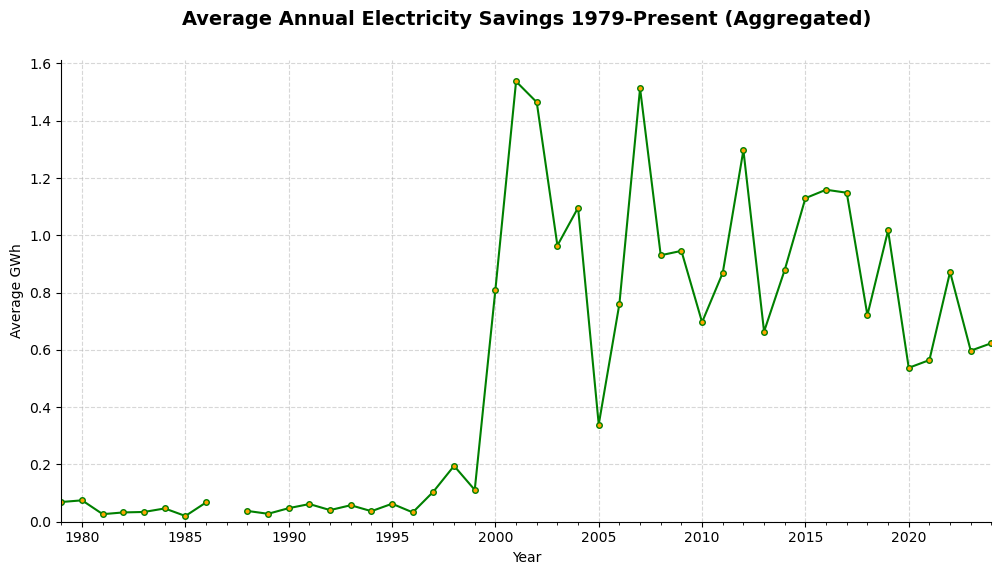

In [32]:
plt.figure(figsize=(12,6))
yearly_savings['Annual_Electric_Savings_GWh'].plot(marker='o', markersize=4, markerfacecolor='orange', color='green')
plt.title('Average Annual Electricity Savings 1979-Present (Aggregated)', fontsize=14, fontweight='bold', pad=25)
plt.ylabel('Average GWh')
plt.ylim(ymin=0)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
#plt.savefig('ecaa_energy_savings.png')

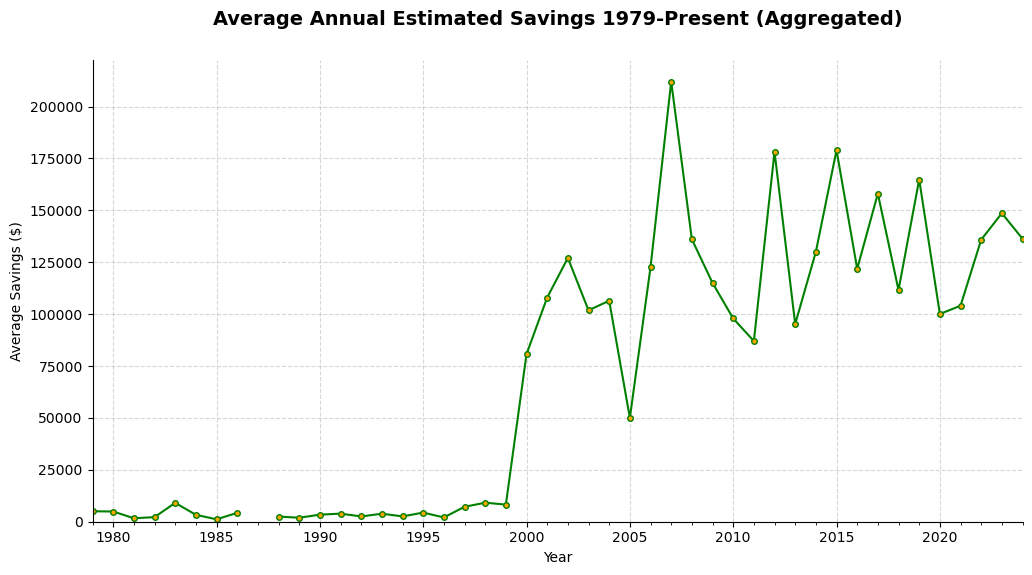

In [33]:
plt.figure(figsize=(12,6))
yearly_savings['Estimated Savings ($/yr)'].plot(marker='o', markersize=4, markerfacecolor='orange', color='green')
plt.title('Average Annual Estimated Savings 1979-Present (Aggregated)', fontsize=14, fontweight='bold', pad=25)
plt.ylabel('Average Savings ($)')
plt.ylim(ymin=0)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
#plt.savefig('ecaa_dollar_savings.png')